In [2]:
import numpy as np
from scipy.signal import find_peaks
import librosa
import os
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
import IPython.display as ipd
from scipy import signal
import math
import random
import statistics as st
import pandas as pd
import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
os.chdir("drive/MyDrive/Colab Notebooks/music")



In [7]:
os.listdir()

['How to get started with Drive.pdf',
 '01380_20141117110954.pdf',
 'Benokraitis_SOC3_Ch3.ppt',
 'Social Interaction and Social Structure.pptx',
 'Privledge.gform',
 'Panger, K 2015-Nonresident.docx',
 'Untitled form (Responses).gsheet',
 'S_history',
 'Data Analytics Reflect Activity.gdoc',
 'PREWORK_KEP',
 'Colab Notebooks',
 'FinalDataProject',
 'playback.m3u',
 'zoom_0.mp4',
 'audio_only.m4a',
 'my story (bad relationship).gdoc',
 'Intro to MongoDB.gslides',
 'Onboarding Outline.gdoc',
 "I am sharing 'Document (1)' with you",
 'Copy of TEMPLATE- Career Strategy Plan (General).gdoc',
 'resume_data_2020_DA.pdf',
 'resume data analyst 2020 analysis.docx',
 'Copy of Resume.gdoc',
 'Untitled spreadsheet.gsheet',
 'Social Problems Readings',
 'Movies',
 'Value Driver Tree for Regression Analysis.gdoc',
 'Resume.gdoc',
 'Copy of Presentation Southern Water Corp [Student Template].pptx',
 'Copy of Southern Water Corp Financial Case Study MCU Student Facing 17052020.xlsx',
 'config',
 'conf

In [18]:
df=pd.DataFrame(columns=["filename","forier", "has_square"])

[]

In [ ]:
os.listdir()[0]

'014 - Run For Your Life.mp3'

In [ ]:
data2=[]
sr2=[]
for i in range (math.floor(len(data1)/2)):
  data2.append(data1[i])

sr2=math.floor(sr1/2)

In [19]:
class soundSample:
  def __init__(self, filename):
    self.name = filename
    self.data = librosa.load(filename)[0]
    self.sr = librosa.load(filename)[1]
    self.t = np.arange(0,len(self.data),1)
    self.n=len(self.data)
    self.fhat=np.fft.fft(self.data,self.n)
    self.PSD = self.fhat+np.conj(self.fhat)/self.n
    self.freq=(1/(self.n)) *np.arange(self.n)
    self.L=np.arange(1,np.floor(self.n/2),dtype="int")
    self.forier = (self.freq[self.L], abs(self.PSD[self.L]))
    self.square=[]
    self.squarePlot=[]
    self.squareAdded=librosa.load(filename)[0]
    self.squareForier= []
    self.squareAmp=[]
    self.squareFreq=[]
    self.squareN=[]
    self.squarePSD=[]
    self.squareFhat=[]
    self.squareFreq=[]
    self.squareL=[]
    self.is_shifted=0

    self.combined = []
    self.combinedN=[]
    self.combinedFhat=[]
    self.combinedPSD = []
    self.combinedFreq=[]
    self.combinedL=[]
    self.combinedForier = []
    
    
  def plotSound(self):
    plt.rcParams['figure.figsize'] = [30,3]
    plt.plot(self.data)

  def plotForier(self):
    plt.plot(self.forier[0],self.forier[1])

  def addSquare(self, amplitude, frequency, time, endpoint):
    dt=0.001* endpoint
    t=np.arange(0,endpoint,dt)
    f=signal.square(amplitude*(2 * np.pi * frequency * t))
    #if is_shifted == 1:
    #  f = f[: math.floor(len(f)/2)]
    #  self.is_shifted = 1
    self.square = f
    self.squareN=len(f)
    self.squareFhat=np.fft.fft(f,self.squareN)
    self.squarePSD = self.squareFhat+np.conj(self.squareFhat)/self.squareN
    self.squareFreq=(1/(self.squareN)) *np.arange(self.squareN)
    self.squareL=np.arange(1,np.floor(self.squareN/2),dtype="int")
    self.squareForier = (self.squareFreq[self.squareL], abs(self.squarePSD[self.squareL]))

    squareAdded=self.squareAdded
    for i in range(len(f)):
      squareAdded[i+time]+=f[i]
    self.squareAdded=squareAdded
    self.squareAmp = amplitude
    self.squareFreq= frequency

    self.combined = squareAdded
    self.combinedN=len(squareAdded)
    self.combinedFhat=np.fft.fft(f,self.combinedN)
    self.combinedPSD = self.combinedFhat+np.conj(self.combinedFhat)/self.combinedN
    self.combinedFreq=(1/(self.combinedN)) *np.arange(self.combinedN)
    self.combinedL=np.arange(1,np.floor(self.combinedN/2),dtype="int")
    self.combinedForier = (self.combinedFreq[self.combinedL], abs(self.combinedPSD[self.combinedL]))
    
  def plotSquareForier(self):
    plt.plot(self.squareForier[0],self.squareForier[1])

  def plotCombinedForier(self):
    plt.plot(self.combinedForier[0],self.combinedForier[1])

  def plotSquare(self):
    plt.rcParams['figure.figsize'] = [5,5]
    is_shifted = self.is_shifted
    if is_shifted == 0:
      t = np.linspace(0, 1, 1000, endpoint=True)
    elif is_shifted == 1:
      t = np.linspace(0, 1, 500, endpoint=True)
    plt.title(f'Sqaure wave - {self.squareFreq} Hz, {self.squareAmp} metres, sampled at 1000 Hz /second')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.ylim(-2, 2)
    plt.plot(t, self.square)
    plt.show()

  def plotCombined(self):
    plt.rcParams['figure.figsize'] = [30,3]
    plt.plot(self.squareAdded)
    plt.show()

In [ ]:
counter=1
row = []
for item in os.listdir():
  data=soundSample(item)
  if counter %2 == 0:
    row.append ([data.forier[1], 0])
    counter +=1
    print(counter)
    print(row)
  else:
    frequency =  random.uniform(0.1, 0.9)
    amplitude = random.uniform(0.4, 1)
    time = random.randint(0,len(data.data)-100)
    endpoint = 30
    data.addSquare(amplitude, frequency, time, endpoint)
    row.append([data.combinedForier[1],1])
    counter +=1
    print(counter)
    print(row)
  


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
data1Sound=soundSample(data1, sr1)
data1Sound.addSquare(0.5, 0.1, 500, endpoint = 30) #minimum 0.2. Try to maximize.


data1Sound.plotSquare()
data1Sound.plotCombined()
data1Sound.plotCombinedForier()

TypeError: ignored

In [ ]:
data2Sound=soundSample(data2, sr2)
data2Sound.addSquare(0.5, 0.1, 100, endpoint = 30) #minimum 0.2. Try to maximize.


#data2Sound.plotSquare()
#data2Sound.plotCombined()
data2Sound.plotSquareForier()


TypeError: ignored

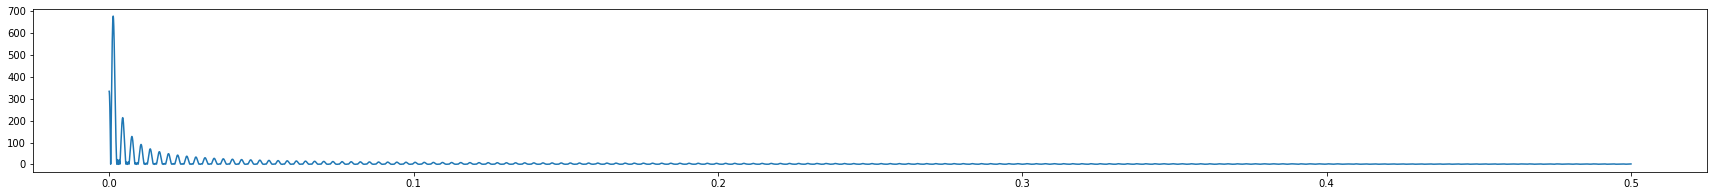

In [ ]:
data1Sound.plotCombinedForier()

In [ ]:
data1Sound.combinedForier[1]

array([333.99977829, 333.99860563, 333.99665118, ...,   2.00000421,
         2.00000243,   2.00000137])

In [ ]:
def cropOrExpand(array1, array2):
  if len(array1)>len(array2):
    newArray2= [0]*len(array1)
    for i in range(len(array2)):
      newArray2[i]=array2[i]
  elif len(array1)<len(array2):
    newArray2=[]
    for i in range(len(array1)):
      newArray2.append(array2[i])
  else:
    pass
  return(newArray2)
      


In [ ]:
newArray2=cropOrExpand(data1Sound.PSD, data2Sound.PSD)
indices=[]
for i in range (len(data1Sound.PSD)):
  if data1Sound.PSD[i] not in newArray2:
    indices.append(data1Sound.PSD[i])
  else:
    indices.append(0)
PSDClean=data1Sound.PSD * indices
fhat=indices * data1Sound.combinedFhat
ffit = np.fft.ifft(fhat) #This is the inverse fourier tranform I think
plt.plot(ffit)

KeyboardInterrupt: ignored

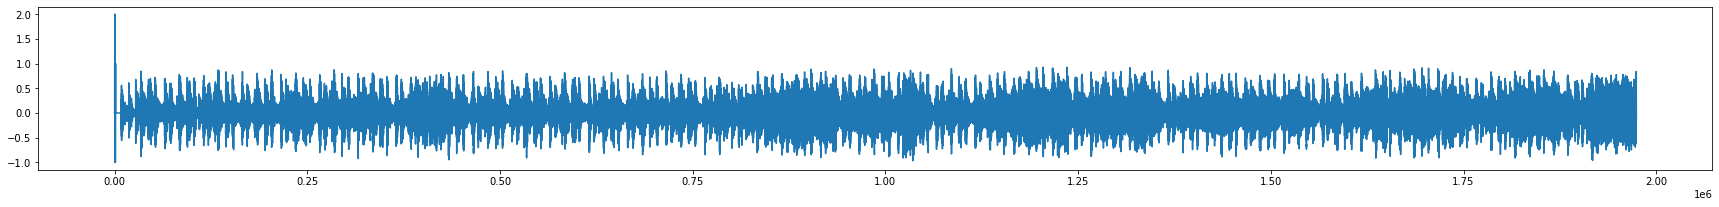

In [ ]:
data1Sound.plotCombined()

In [ ]:
len(data1Sound.PSD)

1974178